Random Forest Accuracy: 0.9990
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest Confusion Matrix:
[[1939    0]
 [   2   59]]

Random Forest ROC AUC Score: 0.9816


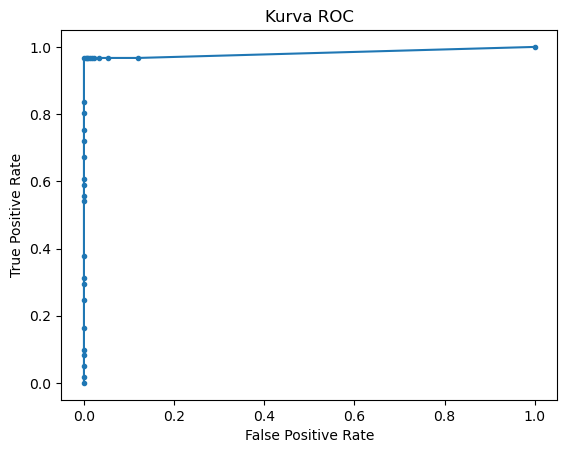

In [1]:
# Mengimport library
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Men-Load dataset dan menyiapkan data
name = 'data.csv'
data = pd.read_csv(name)

data = data.dropna()
data = pd.get_dummies(data, columns=['Type', 'Product ID'])

X = data.drop(['UID', 'Machine failure'], axis=1)
y = data['Machine failure']

# Membagi dataset menjadi set train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Men-Train random forest model
rf_model = RandomForestClassifier(random_state=33)
rf_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Menghitung hasil
accuracy = rf_model.score(X_test, y_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Kesimpulan
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Classification Report:")
print(report)
print(f"Random Forest Confusion Matrix:")
print(conf_matrix)
print(f"\nRandom Forest ROC AUC Score: {roc_auc:.4f}")

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()
